In [1]:
import time
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import linregress
import kspt

## Verify on Sample Sequences

In [2]:
mu = 0.0
sigma2 = 1.0
shift = 5.0
N = 1000

### Unshifted normals

In [3]:
arr1 = np.random.normal(mu, sigma2, N)
out1 = kspt.max_split_ks_perm_test(arr1)

In [4]:
print(f"Max KS distance: {out1[0]:.5f}")
print(f"P-value: {min(out1[-1],1-out1[-1]):.5f}")

Max KS distance: 0.00000
P-value: 0.00000


### Jump-shifted normals

In [5]:
arr2 = np.random.normal(mu, sigma2, N)
arr2[N//2:] += shift
out2 = kspt.max_split_ks_perm_test(arr2)

In [6]:
print(f"Max KS distance: {out2[0]:.5f}")
print(f"P-value: {min(out2[-1],1-out2[-1]):.5f}")

Max KS distance: 0.00000
P-value: 0.00000


### Linear-shifted normals

In [7]:
arr3 = np.random.normal(mu, sigma2, N) + np.linspace(0, shift, N)
out3 = kspt.max_split_ks_perm_test(arr3)

In [8]:
print(f"Max KS distance: {out3[0]:.5f}")
print(f"P-value: {min(out3[-1],1-out3[-1]):.5f}")

Max KS distance: 0.00000
P-value: 0.00000


## Estimate Time Complexity

In [9]:
sizes = np.logspace(2, 5, num=15, dtype=int)
all_times = []  # store all samples per size

N = 1  # Number of runs per size

for n in sizes:
    elapsed_times = []
    for _ in range(N):
        arr = np.random.normal(mu, sigma2, n)

        start = time.time()
        _ = kspt.max_split_ks_perm_test(arr)
        elapsed = time.time() - start

        elapsed_times.append(elapsed)

    all_times.append(elapsed_times)
    avg_time = np.mean(elapsed_times)
    print(f"size = {n:8d} | avg time over {N} runs = {avg_time:.5f} sec")

# Flatten mean for each box for regression
means = [np.mean(times) for times in all_times]

size =      100 | avg time over 1 runs = 0.07327 sec
size =      163 | avg time over 1 runs = 0.09871 sec
size =      268 | avg time over 1 runs = 0.12359 sec
size =      439 | avg time over 1 runs = 0.15814 sec
size =      719 | avg time over 1 runs = 0.26964 sec
size =     1178 | avg time over 1 runs = 0.39464 sec
size =     1930 | avg time over 1 runs = 0.65862 sec
size =     3162 | avg time over 1 runs = 1.09735 sec
size =     5179 | avg time over 1 runs = 1.91259 sec
size =     8483 | avg time over 1 runs = 4.43927 sec
size =    13894 | avg time over 1 runs = 7.51962 sec
size =    22758 | avg time over 1 runs = 14.74474 sec
size =    37275 | avg time over 1 runs = 48.29449 sec
size =    61054 | avg time over 1 runs = 100.40340 sec
size =   100000 | avg time over 1 runs = 232.01565 sec


Approximate empirical time complexity (after burn-in): O(n^1.17)


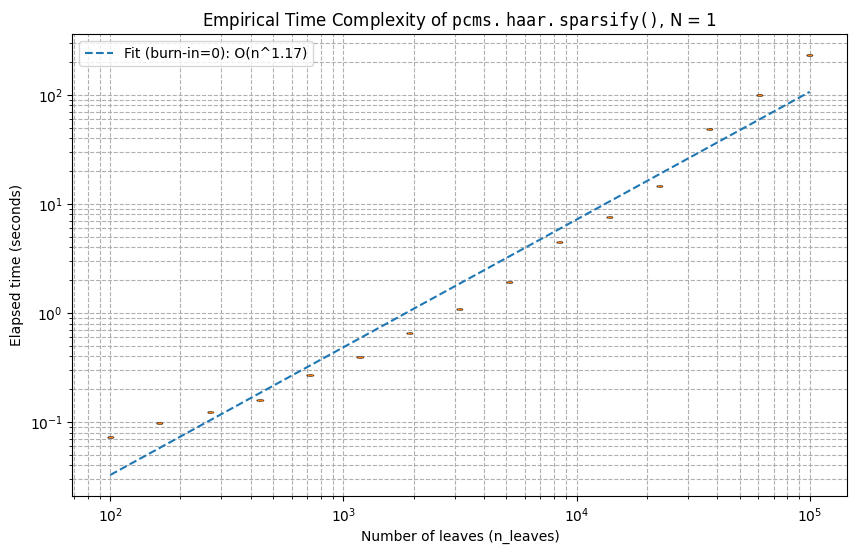

In [10]:
burn_in = 0
sizes_fit = sizes[burn_in:]
means_fit = means[burn_in:]

# Log-log fit on the means
log_sizes = np.log10(sizes_fit)
log_means = np.log10(means_fit)

slope_time, intercept_time, _, _, _ = linregress(log_sizes, log_means)
print(f"Approximate empirical time complexity (after burn-in): O(n^{slope_time:.2f})")

# Best-fit line over full x-axis range for visual
fit_times = 10**(intercept_time + slope_time * np.log10(sizes))

# ---- Box-and-whisker plot ----
plt.figure(figsize=(10, 6))

# Plot boxplot
plt.boxplot(
    all_times, 
    positions=sizes, 
    widths=0.05 * sizes, 
    manage_ticks=False
)

# Best-fit line for mean
plt.loglog(
    sizes, 
    fit_times, 
    '--', 
    color='C0',
    label=f'Fit (burn-in={burn_in}): O(n^{slope_time:.2f})'
)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of leaves (n_leaves)")
plt.ylabel("Elapsed time (seconds)")
plt.title(r"Empirical Time Complexity of $\mathtt{pcms.haar.sparsify()}$, N = "+str(N))
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()